<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [4]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [73]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_age,new_fare
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0,1.0


In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [74]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_age,new_fare
PassengerId,,,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,2.0,0.0
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3.0,1.0
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,0.0,1.0
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1.0,0.0
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,2.0,0.0


**Можно отсортировать этих людей по убыванию платы за билет.**

In [75]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_age,new_fare
PassengerId,,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3.0,1.0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3.0,1.0
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3.0,1.0
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1.0,0.0
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,2.0,0.0


**Пример создания признака.**

In [12]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [13]:
age_categories = [age_category(age) for age in data.Age]


In [14]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [15]:
data['Age_category'] = data['Age'].apply(age_category)

print(data.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Age_category    891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [16]:
quan_male = 0
quan_female = 0


for sex in data.Sex:
    if str(sex) == 'female':
        quan_female+=1
    elif str(sex) == 'male':
        quan_male+=1
        
        
print(str(quan_male) + ' мужчин ' + str(quan_female) +' женщин')        
        
    

577 мужчин 314 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [76]:
new_data = data[(data['Sex'] == 'male') & 
     (data['Pclass'] == 2)]


quan_male = new_data.shape[0]


print(str(quan_male) + ' мужчин ' + 'было 2-го класса')    

108 мужчин было 2-го класса


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [18]:
med_Fare = data['Fare'].median() 

std_Fare = data['Fare'].std() 

print("Медиана - %.2f ,стандартное отклонение - %.2f " % (med_Fare,std_Fare))

Медиана - 14.45 ,стандартное отклонение - 49.69 


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [19]:

all_one = len(data[data.Age < 30].index)
surv_one = len(data[ (data.Age < 30) & (data.Survived == 1)].index)



all_two = len(data[data.Age > 60].index)

surv_two = len(data[ (data.Age > 60) & (data.Survived == 1)].index)

print("Да правда , %.2f%% среди молодых и  %.2f%% среди старых" % (surv_one/all_one*100 , surv_two/all_two*100))

Да правда , 40.62% среди молодых и  22.73% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [20]:
all_female = len(data[data.Sex == 'female'].index)
surv_female = len(data[ (data.Sex == 'female') & (data.Survived == 1)].index)



all_male = len(data[data.Sex == 'male'].index)

surv_male = len(data[ (data.Sex == 'male') & (data.Survived == 1)].index)

print("Да правда , %.2f%% среди мужчин и  %.2f%% среди женщин" % ( surv_male/all_male*100,surv_female/all_female*100))

Да правда , 18.89% среди мужчин и  74.20% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [78]:

Charles = len (data[ (data.Name.str.find('Charles')>0) & (data.Sex == 'male')].index)
Thomas = len (data[ (data.Name.str.find('Thomas')>0) & (data.Sex == 'male')].index)
William = len (data[ (data.Name.str.find('William')>0) & (data.Sex == 'male')].index)
John = len (data[ (data.Name.str.find('John')>0) & (data.Sex == 'male')].index)

print('Кол-во имен среди пассажиров Титаника мужского пола')
print('Charles = ' + str(Charles))
print('Thomas = ' + str(Thomas))
print('William = ' + str(William))
print('John = ' + str(John))

max = 0

if Charles > max:
    max = Charles
    answ = "Charles"
if Thomas > max:
    max = Thomas
    answ = "Thomas"
if William > max:
    max = William
    answ = "William"
if John > max:
    max = John
    answ = "John"    
    
    
print("самое популярное имя среди пассажиров Титаника мужского пола " +
     answ)    



Кол-во имен среди пассажиров Титаника мужского пола
Charles = 20
Thomas = 15
William = 49
John = 36
самое популярное имя среди пассажиров Титаника мужского пола William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

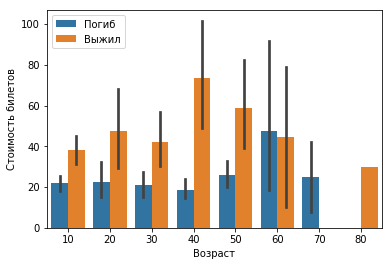

Средний возраст выживших 28.343689655172415
Средний возраст погибших 30.62617924528302
Средний возраст погибших выше


In [72]:
import math
import seaborn as sns
from matplotlib import pyplot as plt

Survived = data[data.Survived == 1]

Dead = data[data.Survived == 0]

meanSurvived =  Survived['Age'].mean()

meanDead =  Dead['Age'].mean()

def func_for_age(x):
    if  (x>0.0 and x<10.0):
        return 0.0
    elif (x>10.0 and x<20.0):
        return 1.0
    elif (x>20.0 and x<30.0):
        return 2.0
    elif (x>30.0 and x<40.0):
        return 3.0
    elif (x>40.0 and x<50.0):
        return 4.0
    elif (x>60.0 and x<70.0):
        return 5.0
    elif (x>70.0 and x<80.0) :
        return 6.0
    elif x>=80.0:
        return 7.0
    else:
        return 0.0
         

data['new_age'] = data['Age'].apply(func_for_age)



#ax = sns.barplot(data=data,
#            x="new_age",
#            y="Fare",
#            hue="Sex")

ax = sns.barplot(data=data,
            x="new_age",
           y="Fare",
          hue="Survived")



xlabels = ['10','20','30','40','50','60','70','80']


ax.set(xticks=range(8) ,  xticklabels=xlabels,xlabel='Возраст',ylabel='Стоимость билетов')



leg = ax.get_legend()
leg.set_title('')
new_labels = ['Погиб', 'Выжил']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
    
#plt.savefig('ris.png')


plt.show()



print( 'Средний возраст выживших ' + str(meanSurvived))

print('Средний возраст погибших ' + str(meanDead))

print('Средний возраст погибших выше')



**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [84]:
#первый пункт
man_one = data[ (data.Sex == 'male') & (data.Pclass == 1)]
print(man_one['Age'].mean())
print('В среднем женщины 1-го класса старше 40 лет ' + '--верно--')


print('\n')

#второй пункт
woman_one = data[ (data.Sex == 'female') & (data.Pclass == 1)]
print(woman_one['Age'].mean())
print('В среднем женщины 1-го класса старше 40 лет ' + '--не верно--')

print('\n')


#третий пункт
man_two = data[ (data.Sex == 'male') & (data.Pclass == 2)]
print(man_two ['Age'].mean())

woman_two  = data[ (data.Sex == 'female') & (data.Pclass == 2)]
print(woman_two ['Age'].mean())

man_three = data[ (data.Sex == 'male') & (data.Pclass == 3)]
print(man_three ['Age'].mean())

woman_three  = data[ (data.Sex == 'female') & (data.Pclass == 3)]
print(woman_three ['Age'].mean())

print('Мужчины всех классов в среднем старше женщин того же класса '  + '--верно--')

print('\n')

#Четвертый пункт
all_one = data[ (data.Pclass == 1)]
all_two = data[ (data.Pclass == 2)]
all_three = data[ (data.Pclass == 3)]

print(all_one['Age'].mean())
print(all_two['Age'].mean())
print(all_three['Age'].mean())
print('В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса '  + '--верно--')

41.28138613861386
В среднем женщины 1-го класса старше 40 лет --верно--


34.61176470588235
В среднем женщины 1-го класса старше 40 лет --не верно--


30.74070707070707
28.722972972972972
26.507588932806325
21.75
Мужчины всех классов в среднем старше женщин того же класса --верно--


38.233440860215055
29.87763005780347
25.14061971830986
В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса --верно--
